# Appendix: Statistics (Part 3)

## Correlation & Regression

### Getting and Preparing the Data (Part 1) 

In [ ]:
import pandas as pd

In [ ]:
movie = pd.read_csv("movies_metadata.csv", low_memory= False)

In [ ]:
movie

In [ ]:
movie.info()

In [ ]:
pd.to_datetime(movie.release_date, errors = "coerce")

In [ ]:
movie = movie.set_index(pd.to_datetime(movie.release_date, errors = "coerce")).drop(columns = ["release_date"])

In [ ]:
movie.sort_index(inplace = True)

In [ ]:
movie

In [ ]:
df = movie.loc[:, ["title", "budget", "revenue"]].copy()

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.budget = pd.to_numeric(df.budget, errors = "coerce")

### Getting and preparing the Data (Part 2) 

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.iloc[:, -2:]  = df.iloc[:, -2:] / 1000000

In [ ]:
df

In [ ]:
df.loc[df.title.isna()]

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

In [ ]:
df.budget.value_counts()

In [ ]:
df.revenue.value_counts()

In [ ]:
df = df.loc[(df.revenue > 0) & (df.budget > 0)]

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.sort_values("budget", ascending = False)

In [ ]:
df.sort_values("revenue", ascending = False)

In [ ]:
df.to_csv("bud_vs_rev.csv")

### How to calculate Covariance and Correlation 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [ ]:
df

In [ ]:
df = df.loc["2016"]

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.mean()

In [ ]:
df.var()

In [ ]:
df.cov()

In [ ]:
df.budget.cov(df.revenue)

In [ ]:
df.corr()

In [ ]:
df.budget.corr(df.revenue)

In [ ]:
df.budget.cov(df.revenue) / (df.budget.std() * df.revenue.std())

In [ ]:
np.cov(df.budget, df.revenue)

In [ ]:
np.corrcoef(df.budget, df.revenue)

### Correlation and Scatterplots – visual Interpretation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [ ]:
df = df.loc["2016"]

In [ ]:
df

In [ ]:
df.plot(kind = "scatter", x = "budget", y = "revenue", figsize = (15, 10), fontsize = 15)
plt.xlabel("Budget (in MUSD)", fontsize = 13)
plt.ylabel("Revenue (in MUSD)", fontsize = 13)
plt.show()

In [ ]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "budget", y = "revenue", height = 8)
plt.show()

### A simple Linear Regression Model with numpy & scipy & seaborn

Create a __simple Linear Regression Model__ with the __independent variable Movie Budget__ and one __dependent variable Movie Revenue__. <br>
Visualize and interpret the __regression coefficients__.

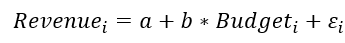

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=2, suppress= True)

In [ ]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [ ]:
df = df.loc["2016"]

In [ ]:
df

In [ ]:
sns.set(font_scale=1.5)
sns.lmplot(data = df, x = "budget", y = "revenue", height = 8, ci = None)
plt.show()

__Linear Regression with numpy__

In [ ]:
x = df.iloc[:, -2].values
x

In [ ]:
y = df.iloc[:, -1].values
y

In [ ]:
reg = np.polyfit(x = x, y = y, deg = 1)
reg

In [ ]:
np.polyfit(x = df.budget, y = df.revenue, deg = 1)

In [ ]:
X = np.array([min(x), max(x)]) #creating x and y values for regression line

In [ ]:
X

In [ ]:
Y = np.polyval(reg, X)

In [ ]:
Y

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(X, Y)
plt.scatter(x = x, y = y)
plt.xlabel("Budget (in MUSD)")
plt.ylabel("Revenue (in MUSD)")
plt.show()

__Linear Regression with scipy__

In [ ]:
df

In [ ]:
stats.linregress(x = df.budget, y = df.revenue)

### How to interpret Regression Coefficients (Intercept and Slope)

In [ ]:
stats.linregress(x = df.budget, y = df.revenue)

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(X, Y)
plt.grid()
plt.scatter(x = x, y = y)
plt.xlabel("Budget (in MUSD)", fontsize = 15)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.title("Linear Regression Model Revenue vs. Budget", fontsize = 15)
plt.show()

In [ ]:
df.budget.cov(df.revenue) / df.budget.var()

### Case Study (Part 1): The Market Model (Single Factor Model)

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = yf.download(["MSFT", "^SP500TR"], start = "2015-12-31", end = "2018-12-31")

In [ ]:
df

In [ ]:
df = df["Adj Close"]

In [ ]:
df

In [ ]:
ret = df.pct_change().dropna()

In [ ]:
ret

In [ ]:
ret.plot(x = "^SP500TR", y = "MSFT", figsize = (12, 8), kind = "scatter")
plt.grid()
plt.title("MSFT vs. SP500 (daily returns)", fontsize = 15)
plt.show()

In [ ]:
r, p_value = stats.pearsonr(ret["^SP500TR"], ret.MSFT)

In [ ]:
r

In [ ]:
p_value

### Case Study (Part 2): The Market Model (Single Factor Model)

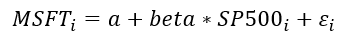

In [ ]:
beta, intercept, rvalue, pvalue, stderr = stats.linregress(x = ret["^SP500TR"], y = ret.MSFT)

In [ ]:
beta

In [ ]:
intercept

In [ ]:
rvalue

In [ ]:
sns.set(font_scale=1.5)
sns.lmplot(data = ret, x = "^SP500TR", y = "MSFT", height = 8, ci = None)
plt.show()